In [1]:
import pandas as pd
from datetime import datetime, timedelta

def generate_marketing_events():
    ...

In [5]:
from src.data_generator.channels import DisplayAd

campaign = DisplayAd("Test", 100, 5, .5)

DisplayAd.serve_ad(campaign)


Ad 'Test' served to 97 users.
50 users clicked the ad and became visitors.


In [6]:
campaign.ad_name

'Test'

In [5]:
start_date = '2024-01-01'
end_date = '2024-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'date': date_range})


In [6]:
df

,date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
361,2024-12-27
362,2024-12-28
363,2024-12-29
364,2024-12-30


In [ ]:
second_tuesdays = []
for year in range(df['date'].dt.year.min(), df['date'].dt.year.max() + 1):
    for month in range(1, 13):
        first_day = datetime(year, month, 1)
        first_tuesday = first_day + timedelta(days=(1 - first_day.weekday() + 7) % 7)
        second_tuesday = first_tuesday + timedelta(days=7)
        if datetime.strptime(start_date, "%Y-%m-%d") <= second_tuesday <= datetime.strptime(end_date, "%Y-%m-%d"):
            second_tuesdays.append(second_tuesday.date())

df['email_send'] = df['date'].dt.date.isin(second_tuesdays)

In [12]:
df[df['email_send']==True]

,date,email_send
8,2024-01-09,True
43,2024-02-13,True
71,2024-03-12,True
99,2024-04-09,True
134,2024-05-14,True
162,2024-06-11,True
190,2024-07-09,True
225,2024-08-13,True
253,2024-09-10,True
281,2024-10-08,True


Emails
- Weekly Awareness Email (every Tuesday to non-enrolled)
- Welcome Emails (Post-email sign-up)
- Post enrollment emails

Display
- Digital Ad 
- Impressions
- CPM
- CTR %

Paid Search 
- Impressions
- Clicks (how does cost structure work here)



In [ ]:
class Email:
    def __init__(self, subject, body, open_rate=0.3, click_rate=0.1):
        """
        Initialize an email with subject, body, and engagement probabilities.

        Parameters:
        - subject (str): The subject of the email.
        - body (str): The body content of the email.
        - open_rate (float): Probability of a recipient opening the email (0-1).
        - click_rate (float): Probability of clicking on the email if opened (0-1).
        """
        self.subject = subject
        self.body = body
        self.open_rate = open_rate
        self.click_rate = click_rate
        self.opened = False
        self.clicked = False

    def receive(self):
        """Simulate receiving the email."""
        print(f"Received email: {self.subject}")

    def attempt_open(self):
        """Simulate the recipient deciding whether to open the email."""
        self.opened = random.random() < self.open_rate
        if self.opened:
            print(f"Email opened: {self.subject}")
        else:
            print("Email ignored.")

    def attempt_click(self):
        """Simulate the recipient deciding whether to click the email."""
        if self.opened:
            self.clicked = random.random() < self.click_rate
            if self.clicked:
                print(f"Link clicked from email: {self.subject}")
            else:
                print("Email read but no click.")
        else:
            print("Email was not opened, so no click.")

# Example Simulation
email = Email("Spring Promo!", "Get 20% off now!", open_rate=0.4, click_rate=0.2)

# Simulating user behavior
email.receive()
email.attempt_open()
email.attempt_click()

In [ ]:
import numpy as np

def logistic_saturation(max_users, spend, sat_threshold, scaling_factor):
    return max_users / (1 + np.exp(- (spend - sat_threshold) / (scaling_factor * sat_threshold)))

class DisplayAd:
    ##TODO: Simulate user universe so that we can add carry-over effects
    ##Store campaign data per day in database table
    def __init__(self, campaign_name, spend, sat_threshold, scaling_factor=.2, max_users=10000, click_probability = .02):
        """
        Initialize a Display Ad simulation with saturation effects.

        Parameters:
        - spend (float): The ad spend amount.
        - sat_threshold (float): The spend level where diminishing returns start.
        - max_users (int): Maximum potential users that could be reached.
        """
        self.campaign_name = campaign_name
        self.spend = spend
        self.sat_threshold = sat_threshold
        self.max_users = max_users
        self.scaling_factor = scaling_factor
        self.click_probability = click_probability

    def impressions_served(self):
        """
        Calculate the number of users reached based on spend, using a logistic function
        to model saturation effects.

        Returns:
        - int: The number of users reached.
        """
        users_reached = logistic_saturation(self.max_users, self.spend, self.sat_threshold, self.scaling_factor)
        return int(users_reached)
    
    def ad_clicks(self, users_reached):
        clicks = np.random.binomial(users_reached, self.click_probability)
        return int(clicks)

    
# Example usage
ad_campaign = DisplayAd('Test-Ad', spend=2000, sat_threshold=5000)
users_reached = ad_campaign.impressions_served()
users_clicks = ad_campaign.ad_clicks(users_reached)

# print(users_reached)
print(users_reached)
print(users_clicks)

474
13


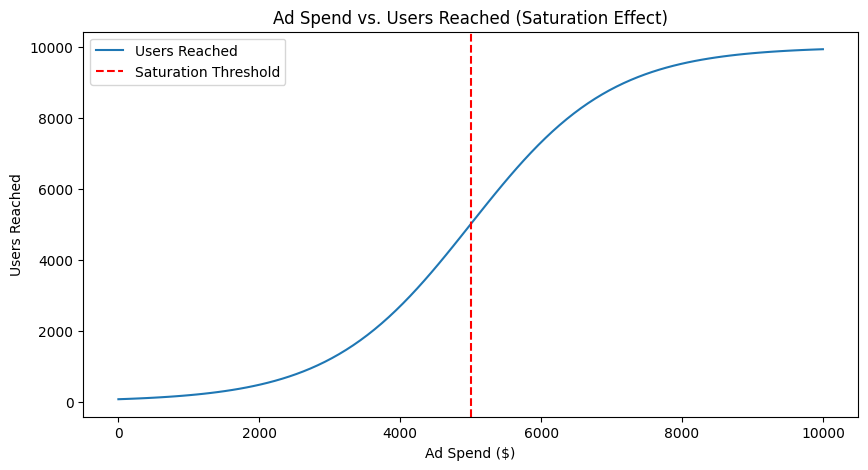

In [75]:
spend_range = np.linspace(0, 10000, 100)
max_users = 10000
users = [max_users / saturation(spend,sat_threshold=5000,scaling_factor=.2) for spend in spend_range]
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(spend_range, users, label='Users Reached')
plt.axvline(5000, color='r', linestyle='--', label='Saturation Threshold')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Users Reached')
plt.title('Ad Spend vs. Users Reached (Saturation Effect)')
plt.legend()

plt.show()

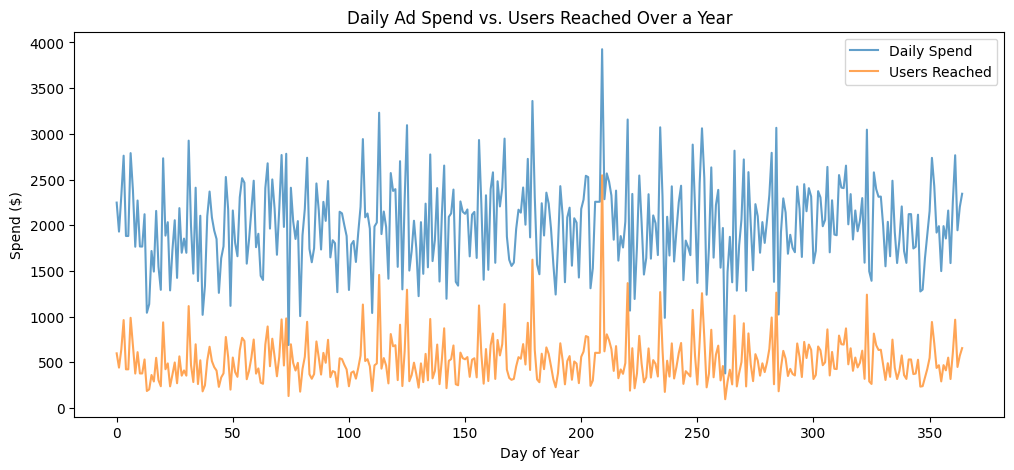

In [47]:
# 2. Simulate Daily Spend Over a Year
np.random.seed(42)
year_spend = np.random.normal(loc=2000, scale=500, size=365)
year_users_reached = [DisplayAd('Test-Ad', spend, sat_threshold=5000).impressions_served() for spend in year_spend]

# Plot Daily Spend vs Users Reached
plt.figure(figsize=(12, 5))
plt.plot(year_spend, label="Daily Spend", alpha=0.7)
plt.plot(year_users_reached, label="Users Reached", alpha=0.7)
plt.xlabel("Day of Year")
plt.ylabel("Spend ($)")
plt.title("Daily Ad Spend vs. Users Reached Over a Year")
plt.legend()
plt.show()